<a href="https://colab.research.google.com/github/amnakhan1221/EDA/blob/main/Suicide_Bombing_Attacks_in_Pakistan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [10]:
# Load the dataset (you may need to upload manually in Colab via the UI or use files.upload())
from google.colab import files
uploaded = files.upload()


# Read the CSV
df = pd.read_csv('Suicide_bombing_attacks.csv')


Saving Suicide_bombing_attacks.csv to Suicide_bombing_attacks (1).csv


In [11]:
# --- Basic info ---
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

Shape of dataset: (988, 25)

Missing values:
 Date                         0
Islamic Date               310
Blast Day Type              21
Holiday Type               844
Time                       422
City                         0
Latitude                     5
Longitude                    5
Province                     0
Location                     6
Location Category            0
Location Sensitivity         0
Open/Closed Space           70
Influencing Event/Event    610
Target Type                  0
Targeted Sect if any       794
Killed Min                 292
Killed Max                   0
Injured Min                262
Injured Max                 64
No. of Suicide Blasts      164
Explosive Weight (max)     647
Hospital Names             397
Temperature(C)              10
Temperature(F)              14
dtype: int64

Data types:
 Date                        object
Islamic Date                object
Blast Day Type              object
Holiday Type                object
Time        

In [12]:
df.head()

,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,Location,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,Egyptian Embassy,...,NaN,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,office of Nawa-e-Waqt,...,NaN,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,Pakistan Navy bus Parked outside Five Star She...,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,US Consulate Civil Lines Area,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,Imambargah MeCongy Road Quetta,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     988 non-null    object 
 1   Islamic Date             678 non-null    object 
 2   Blast Day Type           967 non-null    object 
 3   Holiday Type             144 non-null    object 
 4   Time                     566 non-null    object 
 5   City                     988 non-null    object 
 6   Latitude                 983 non-null    float64
 7   Longitude                983 non-null    object 
 8   Province                 988 non-null    object 
 9   Location                 982 non-null    object 
 10  Location Category        988 non-null    object 
 11  Location Sensitivity     988 non-null    object 
 12  Open/Closed Space        918 non-null    object 
 13  Influencing Event/Event  378 non-null    object 
 14  Target Type              9

In [14]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df['City'] = df['City'].fillna('Unknown')
df['Province'] = df['Province'].fillna('Unknown')
df['Targeted Sect if any'] = df['Targeted Sect if any'].fillna('None')
df['Killed Max'] = pd.to_numeric(df['Killed Max'], errors='coerce').fillna(0)
df['Injured Max'] = pd.to_numeric(df['Injured Max'], errors='coerce').fillna(0)
df['Explosive Weight (max)'] = pd.to_numeric(df['Explosive Weight (max)'], errors='coerce').fillna(0)
df['Temperature(C)'] = pd.to_numeric(df['Temperature(C)'], errors='coerce').fillna(df['Temperature(C)'].mean())
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

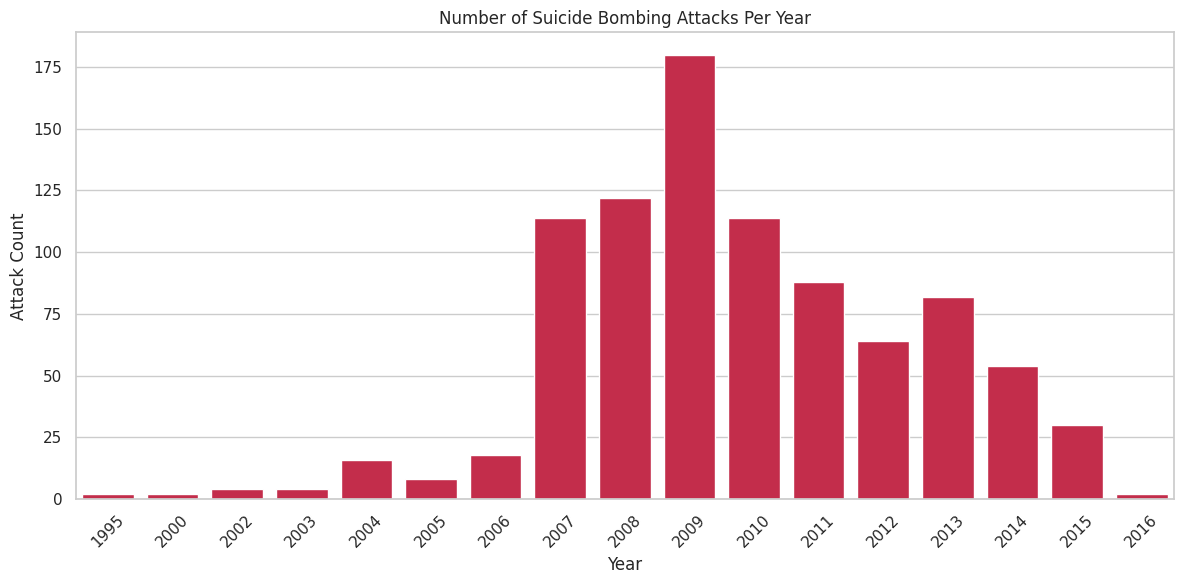

In [18]:
# --- 4.1 Number of Attacks per Year ---
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Year', order=sorted(df['Year'].unique()), color='crimson')
plt.title('Number of Suicide Bombing Attacks Per Year')
plt.xticks(rotation=45)
plt.ylabel("Attack Count")
plt.tight_layout()
plt.show()


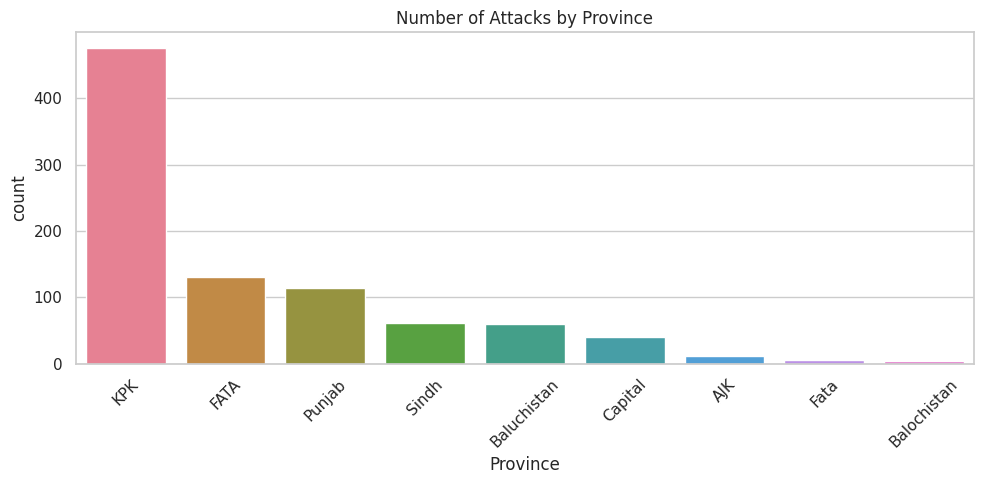

In [22]:
# --- 4.2 Number of Attacks by Province ---
# --- 4.2 Number of Attacks by Province ---
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df,
    x='Province',
    order=df['Province'].value_counts().index,
    palette='husl'  # You can try 'Set2', 'tab10', 'pastel', etc.
)
plt.title('Number of Attacks by Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



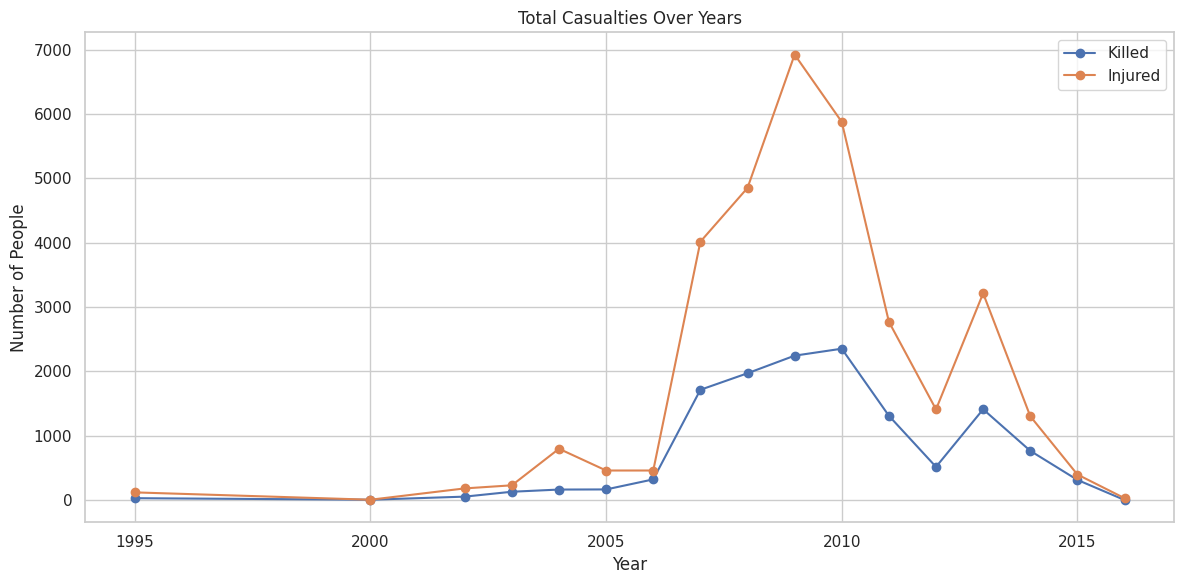

In [23]:
# --- 4.3 Killed and Injured Over Years ---
killed_year = df.groupby('Year')['Killed Max'].sum().reset_index()
injured_year = df.groupby('Year')['Injured Max'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(killed_year['Year'], killed_year['Killed Max'], marker='o', label='Killed')
plt.plot(injured_year['Year'], injured_year['Injured Max'], marker='o', label='Injured')
plt.title('Total Casualties Over Years')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

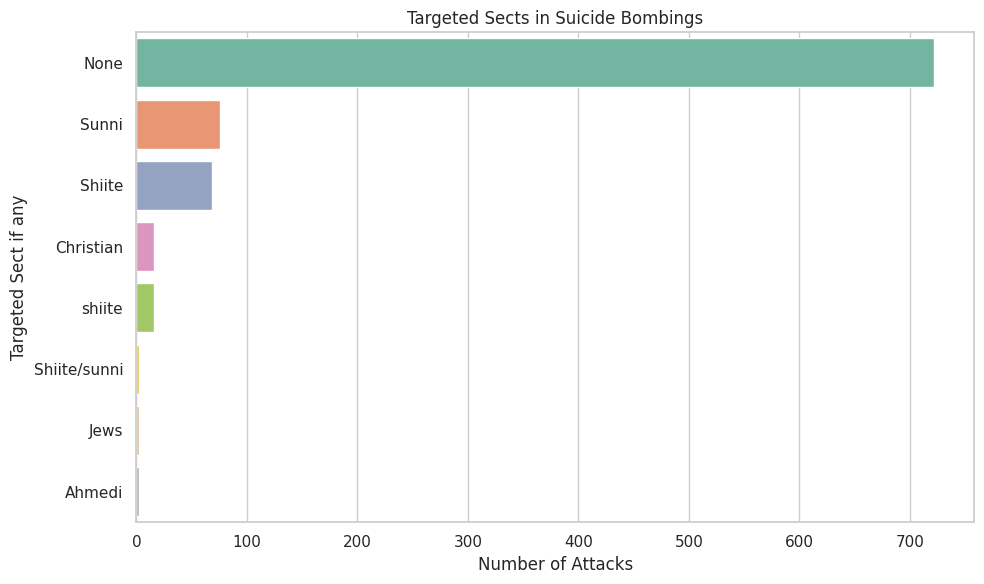

In [24]:
# --- 4.4 Targeted Sects Distribution ---
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    y='Targeted Sect if any',
    order=df['Targeted Sect if any'].value_counts().index,
    palette='Set2'  # Try 'husl', 'tab10', 'pastel', etc.
)
plt.title('Targeted Sects in Suicide Bombings')
plt.xlabel('Number of Attacks')
plt.tight_layout()
plt.show()


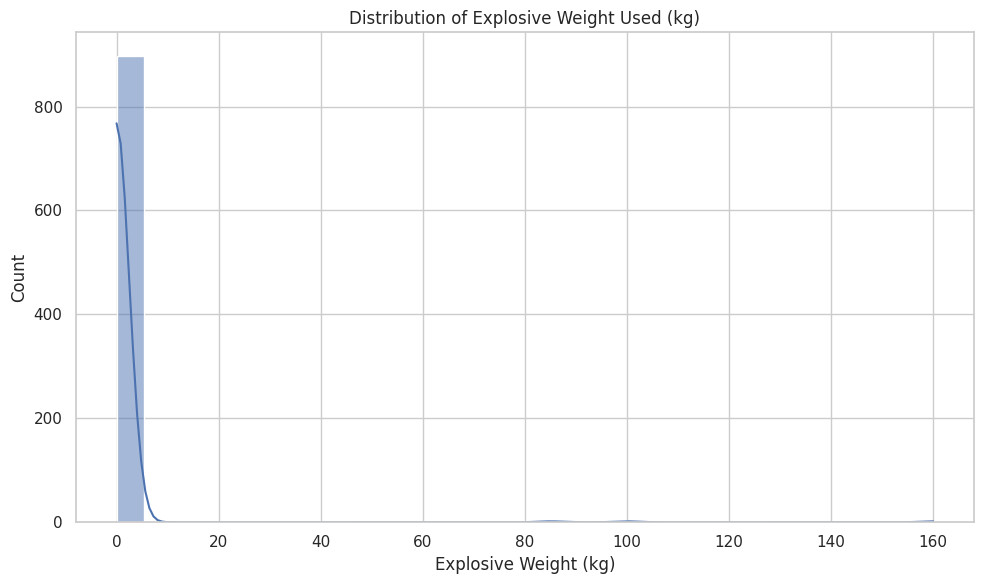

In [26]:
# --- 4.5 Explosive Weight Distribution ---
plt.figure(figsize=(10,6))
sns.histplot(df['Explosive Weight (max)'], bins=30, kde=True)
plt.title('Distribution of Explosive Weight Used (kg)')
plt.xlabel('Explosive Weight (kg)')
plt.tight_layout()
plt.show()

In [27]:
# --- 4.7 Map of Attacks (Optional) ---

df["Killed Max"] = pd.to_numeric(df["Killed Max"], errors='coerce').fillna(0).astype(int)
df["Injured Max"] = pd.to_numeric(df["Injured Max"], errors='coerce').fillna(0).astype(int)
df["Latitude"] = pd.to_numeric(df["Latitude"], errors='coerce')
df["Longitude"] = pd.to_numeric(df["Longitude"], errors='coerce')

# Drop rows with missing coordinates
df = df.dropna(subset=["Latitude", "Longitude"])

# Plot map
import plotly.express as px

fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    hover_name="City",
    hover_data={"Date": True, "Province": True, "Killed Max": True, "Injured Max": True},
    color_discrete_sequence=["red"],
    zoom=4,
    height=600
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Map of Suicide Bombing Attacks in Pakistan")
fig.show()

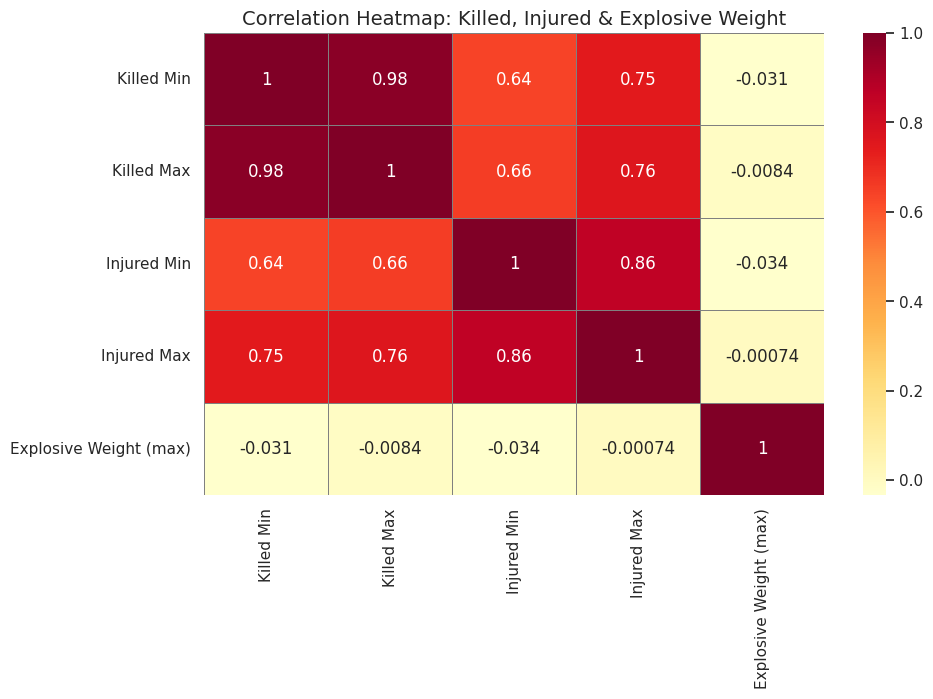

In [28]:
# Select only numeric columns for correlation
correlation_data = df[["Killed Min", "Killed Max", "Injured Min", "Injured Max", "Explosive Weight (max)"]]

# Compute correlation matrix
corr_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="YlOrRd", linewidths=0.5, linecolor='gray')
plt.title("Correlation Heatmap: Killed, Injured & Explosive Weight", fontsize=14)
plt.show()


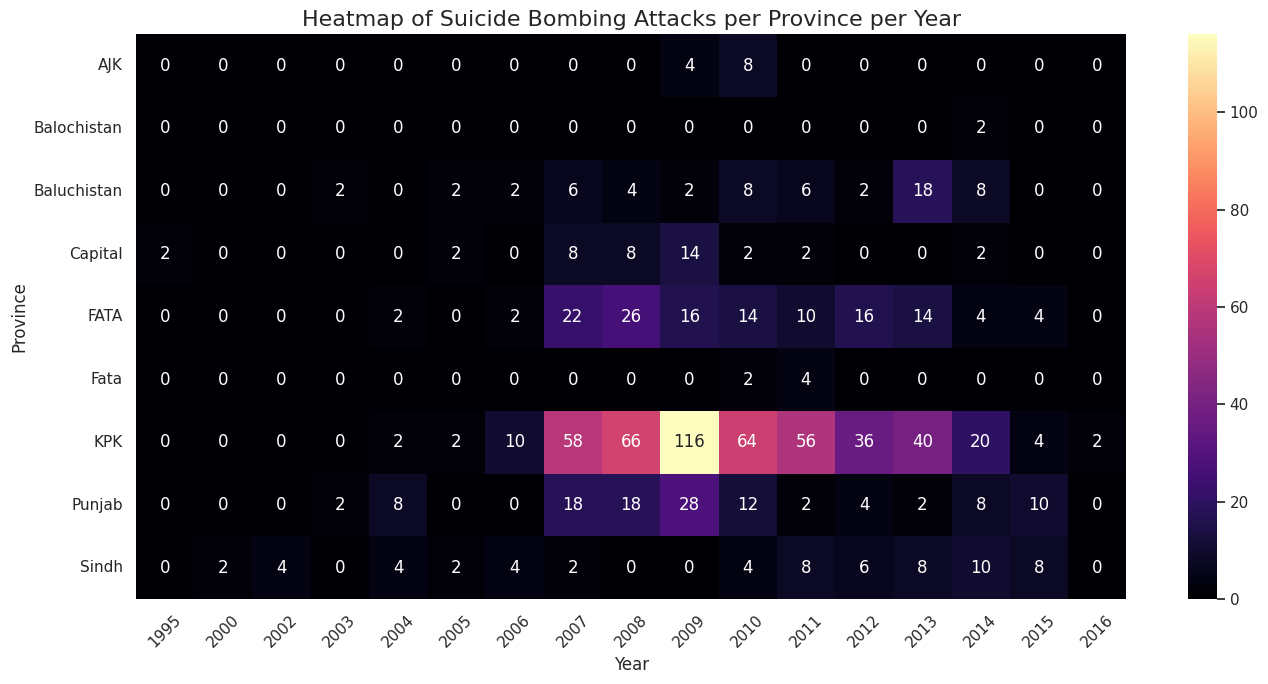

In [30]:

# Convert 'Date' to datetime and extract year
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
df["Year"] = df["Date"].dt.year

# Create pivot table
heatmap_data = df.pivot_table(index='Province', columns='Year', values='City', aggfunc='count', fill_value=0)

# Plot heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap="magma")  # changed cmap here
plt.title("Heatmap of Suicide Bombing Attacks per Province per Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Province")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


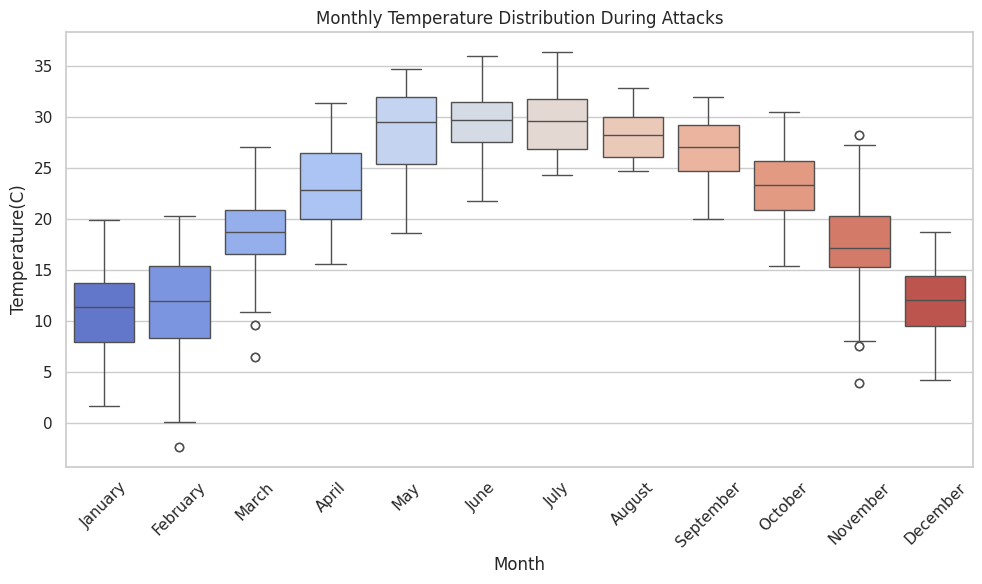

In [32]:
# --- 4.6 Temperature vs Attacks ---
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Month',
    y='Temperature(C)',
    data=df,
    order=pd.date_range("2022-01-01", periods=12, freq='M').strftime('%B'),
    palette='coolwarm'  # Choose your color scheme here
)
plt.title('Monthly Temperature Distribution During Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
